### Cyclistic : Case Study :  How does a bike-share navigate speedy success?

### Introduction
This analysis is for the Capstone Project of the Google Data Analytics Profeesional Certificate. It is based on the case study of Kevin Hartman [‘Sophisticated, Clear, and Polished’: Divvy and Data Visualization](http://artscience.blog/home/divvy-dataviz-case-study) who is the original writer of this case study.

### Scenario
As a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
our team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
our team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

### ASK

* **Business Task**
To discover how casual riders and Cyclistic members use their rental bikes differently and on those insights **design a new marketing strategy to convert casual riders into annual members**.

 * **Key Stakeholders**

    * ***Primary Stakeholders***
        1. Lily Moreno, Director of Marketing
        2. Cyclistic Executive Team
      
    *  ***Secondary Stakeholders***
        1. Marketing and Analytics Team     

### PREPARE
We will use Cyclistic’s historical trip data of 12 months **August 01, 2020**  to  **July 31,2021** to analyze and identify trends.

**Downloading Data**

**Data Source** : The datasets used in this analysis have been made available by Motivate International Inc under this [license agreement.](https://www.divvybikes.com/data-license-agreement)

Click [here](http://divvy-tripdata.s3.amazonaws.com/index.html) to view the dataset


**Organizational Structure of Dataset**
All trip data is in comma-delimited (.CSV) format with 13 columns, 
including:ride_id''rideable_type''started_at''ended_at''start_station_name''start_station_id''end_station_name''end_station_id''start_lat''start_lng''end_lat''end_lng''member_casual'


**Credibility of datasource**
[Data License Agreement](http://www.divvybikes.com/data-license-agreement)

### PROCESS

#### *Choosing the right tool*
For this analysis, we will be using **R** for its statistical analysis tools and data visualizations libraries.

#### *Loading required libraries*

In [36]:
library(tidyverse)  #helps wrangle data
library(dplyr)
library(sqldf)
library(modeest)    #helps with the statistical functions
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

#### *Uploading the dataset into dataframes*

In [ ]:
df1<-read_csv("../input/cyclistic/202008-divvy-tripdata.csv")
df2<-read_csv("../input/cyclistic/202009-divvy-tripdata.csv")
df3<-read_csv("../input/cyclistic/202010-divvy-tripdata.csv")
df4<-read_csv("../input/cyclistic/202011-divvy-tripdata.csv")
df5<-read_csv("../input/cyclistic/202012-divvy-tripdata.csv")
df6<-read_csv("../input/cyclistic/202101-divvy-tripdata.csv")
df7<-read_csv("../input/cyclistic/202102-divvy-tripdata.csv")
df8<-read_csv("../input/cyclistic/202103-divvy-tripdata.csv")
df9<-read_csv("../input/cyclistic/202104-divvy-tripdata.csv")
df10<-read_csv("../input/cyclistic/202105-divvy-tripdata.csv")
df11<-read_csv("../input/cyclistic/202106-divvy-tripdata.csv")
df12<-read_csv("../input/cyclistic/202107-divvy-tripdata.csv")


#### *Inspecting column consistency*

In [38]:
colnames(df1)
colnames(df2)
colnames(df3)
colnames(df4)
colnames(df5)
colnames(df6)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

#### *Inspecting column structure/summary for consistency*


In [39]:
str(df1)
str(df2)
str(df3)
str(df4)
str(df5)
str(df6)
str(df7)
str(df12)

spec_tbl_df [622,361 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:622361] "322BD23D287743ED" "2A3AEF1AB9054D8B" "67DC1D133E8B5816" "C79FBBD412E578A7" ...
 $ rideable_type     : chr [1:622361] "docked_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:622361], format: "2020-08-20 18:08:14" "2020-08-27 18:46:04" ...
 $ ended_at          : POSIXct[1:622361], format: "2020-08-20 18:17:51" "2020-08-27 19:54:51" ...
 $ start_station_name: chr [1:622361] "Lake Shore Dr & Diversey Pkwy" "Michigan Ave & 14th St" "Columbus Dr & Randolph St" "Daley Center Plaza" ...
 $ start_station_id  : num [1:622361] 329 168 195 81 658 658 196 67 153 177 ...
 $ end_station_name  : chr [1:622361] "Clark St & Lincoln Ave" "Michigan Ave & 14th St" "State St & Randolph St" "State St & Kinzie St" ...
 $ end_station_id    : num [1:622361] 141 168 44 47 658 658 49 229 225 305 ...
 $ start_lat         : num [1:622361] 41.9 41.9 41.9 41.9 41.9 ...
 

#### *Transforming the data*

**Dataframes df1 to df4 columns start_station_id, end_station_id has datatype double which is not consistent with start_station_id,end_station_id of the dataframes df5 to df 12**

**To solve this use mutate function to cast the datatype accordingly so as all columns are consistent**

In [40]:
df1 <-  mutate(df1, start_station_id = as.character(start_station_id))
df2 <-  mutate(df2, start_station_id = as.character(start_station_id))
df3 <-  mutate(df3, start_station_id = as.character(start_station_id))
df4 <-  mutate(df4, start_station_id = as.character(start_station_id)) 

df1 <-  mutate(df1, end_station_id = as.character(end_station_id))
df2 <-  mutate(df2, end_station_id = as.character(end_station_id))
df3 <-  mutate(df3, end_station_id = as.character(end_station_id))
df4 <-  mutate(df4, end_station_id = as.character(end_station_id)) 

#### Merging the 12 dataframes into one.

##### *Alternatively in SQL this can be done by UNION function as there are no primary keys i.e. relationship amongst the tables so joins cannot be performed*

In [41]:
all_trips <- bind_rows(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12)

#### *Exploring the merged dataframe*

In [42]:
head(all_trips)  #View the first 6 rows of data frame.  

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.93259,-87.63643,41.91569,-87.63460,member
2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.86438,-87.62368,41.86422,-87.62344,casual
67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464,-87.61955,41.88497,-87.62757,casual
C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.88409,-87.62964,41.88958,-87.62754,casual
13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90299,-87.68377,41.90300,-87.68384,casual
56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90302,-87.68373,41.90309,-87.68363,casual


In [43]:
tail(all_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7B47CA3E874D260F,electric_bike,2021-07-04 05:34:53,2021-07-04 05:36:46,NA,NA,NA,NA,41.72,-87.68,41.72,-87.68,member
1E660BF8DCDAAAB6,electric_bike,2021-07-04 10:40:41,2021-07-04 11:30:13,NA,NA,NA,NA,41.72,-87.68,41.77,-87.66,member
A2448BDFD9B3653D,electric_bike,2021-07-04 12:47:41,2021-07-04 12:54:46,NA,NA,NA,NA,41.77,-87.66,41.78,-87.66,member
2D612BF8530379DA,electric_bike,2021-07-03 21:41:58,2021-07-03 21:57:14,NA,NA,NA,NA,41.72,-87.68,41.72,-87.68,member
6D615D18B765C9B3,electric_bike,2021-07-03 22:10:31,2021-07-03 22:11:39,NA,NA,NA,NA,41.72,-87.68,41.72,-87.68,member
0F31D311323F0048,electric_bike,2021-07-04 07:03:50,2021-07-04 07:32:38,NA,NA,NA,NA,41.72,-87.68,41.72,-87.68,member


In [44]:
str(all_trips)  #For list of columns and data types (numeric, character, etc)

spec_tbl_df [4,731,081 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4731081] "322BD23D287743ED" "2A3AEF1AB9054D8B" "67DC1D133E8B5816" "C79FBBD412E578A7" ...
 $ rideable_type     : chr [1:4731081] "docked_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:4731081], format: "2020-08-20 18:08:14" "2020-08-27 18:46:04" ...
 $ ended_at          : POSIXct[1:4731081], format: "2020-08-20 18:17:51" "2020-08-27 19:54:51" ...
 $ start_station_name: chr [1:4731081] "Lake Shore Dr & Diversey Pkwy" "Michigan Ave & 14th St" "Columbus Dr & Randolph St" "Daley Center Plaza" ...
 $ start_station_id  : chr [1:4731081] "329" "168" "195" "81" ...
 $ end_station_name  : chr [1:4731081] "Clark St & Lincoln Ave" "Michigan Ave & 14th St" "State St & Randolph St" "State St & Kinzie St" ...
 $ end_station_id    : chr [1:4731081] "141" "168" "44" "47" ...
 $ start_lat         : num [1:4731081] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng        

##### *SUMMARY OF THE DATAFRAME*

In [45]:
summary(all_trips)  #Statistical summary of data. Mainly for numeric

   ride_id          rideable_type        started_at                 
 Length:4731081     Length:4731081     Min.   :2020-08-01 00:00:01  
 Class :character   Class :character   1st Qu.:2020-10-03 08:51:57  
 Mode  :character   Mode  :character   Median :2021-04-05 13:41:29  
                                       Mean   :2021-02-17 10:22:09  
                                       3rd Qu.:2021-06-15 05:47:53  
                                       Max.   :2021-07-31 23:59:58  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2020-08-01 00:04:41   Length:4731081     Length:4731081    
 1st Qu.:2020-10-03 09:13:58   Class :character   Class :character  
 Median :2021-04-05 14:03:51   Mode  :character   Mode  :character  
 Mean   :2021-02-17 10:44:21                                        
 3rd Qu.:2021-06-15 06:16:14                                        
 Max.   :2021-08-12 17:45:41      

##### There are 4731081 rows and 13 columns that are to be analysed

In [46]:
table(all_trips$member_casual)   #seeing how many observations fall under each user type


 casual  member 
2102079 2629002 

In [47]:
table(all_trips$rideable_type)   #seeing how many observations fall under each bike type


 classic_bike   docked_bike electric_bike 
      1785514       1558350       1387217 

#### ***Add a "ride_length" calculation to all_trips (in minutes)***

##### To obtain the ride_length in seconds one can use "secs" argument instead of mins in difftime() function


##### ALTERNATIVELY: When using spreadsheets one can use functions or formulas to calculate the ride length

In [48]:
all_trips$ride_length_mins <- as.numeric(difftime(all_trips$ended_at,all_trips$started_at,units = "mins"))


In [49]:
all_trips$ride_length_mins<-round(all_trips$ride_length_mins,digits=2)  #Rounding off to 2 decimal places
head(all_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_mins
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329,Clark St & Lincoln Ave,141,41.93259,-87.63643,41.91569,-87.63460,member,9.62
2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168,Michigan Ave & 14th St,168,41.86438,-87.62368,41.86422,-87.62344,casual,68.78
67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195,State St & Randolph St,44,41.88464,-87.61955,41.88497,-87.62757,casual,128.88
C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81,State St & Kinzie St,47,41.88409,-87.62964,41.88958,-87.62754,casual,48.07
13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90299,-87.68377,41.90300,-87.68384,casual,10.78
56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658,Leavitt St & Division St,658,41.90302,-87.68373,41.90309,-87.68363,casual,41.45


#### *Filtering out of data*

##### **Using filter function to filter out the test stations so that it won't affect the anlaysis**

In [50]:
all_trips_v2<-filter(all_trips, ride_length_mins>0)

all_trips_v2<-filter(all_trips_v2, start_station_name!="WATSON TESTING - DIVVY")
all_trips_v2<-filter(all_trips_v2, ride_length_mins>1)

#### *Using sqldf library to perform SQL queries on dataframe to Query the dataframes according to our analysis*

In [51]:
sqldf("SELECT * 
      FROM all_trips_v2
      WHERE start_station_name IS NULL")


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_mins
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>


In [52]:


sqldf("SELECT * 
      FROM all_trips_v2
      WHERE start_station_name ='W Oakdale Ave & N Broadway' AND start_station_id IS NULL LIMIT 20")



ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_mins
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
D429DC359F7F7CA5,electric_bike,2020-08-07 16:28:34,2020-08-07 16:49:12,W Oakdale Ave & N Broadway,NA,NA,NA,41.94,-87.64,41.94000,-87.64000,casual,20.63
87604F9E0202C24C,electric_bike,2020-08-28 08:29:35,2020-08-28 09:18:49,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94,-87.64,41.94000,-87.64000,casual,49.23
7E1268F06DB1E8ED,electric_bike,2020-08-22 14:25:05,2020-08-22 14:32:07,W Oakdale Ave & N Broadway,NA,Clark St & Wrightwood Ave,340,41.94,-87.64,41.92956,-87.64358,casual,7.03
ED4D2E4B2B836445,electric_bike,2020-08-22 14:25:28,2020-08-22 14:32:10,W Oakdale Ave & N Broadway,NA,Clark St & Wrightwood Ave,340,41.94,-87.64,41.92955,-87.64361,casual,6.70
54A93E5423F9B0E4,electric_bike,2020-08-22 14:17:21,2020-08-22 14:25:15,W Oakdale Ave & N Broadway,NA,Racine Ave & Belmont Ave,226,41.94,-87.64,41.93965,-87.65888,casual,7.90
AB27BF03CA7A5847,electric_bike,2020-08-30 10:44:40,2020-08-30 10:58:35,W Oakdale Ave & N Broadway,NA,Wells St & Elm St,182,41.94,-87.64,41.90329,-87.63438,casual,13.92
1A727B3FEC0E5874,electric_bike,2020-08-29 20:56:04,2020-08-29 21:12:04,W Oakdale Ave & N Broadway,NA,Sheridan Rd & Montrose Ave,231,41.94,-87.64,41.96140,-87.65449,casual,16.00
677688790EADF145,electric_bike,2020-08-21 07:37:51,2020-08-21 07:51:41,W Oakdale Ave & N Broadway,NA,Leavitt St & Belmont Ave,664,41.94,-87.64,41.93931,-87.68320,casual,13.83
B27E08D1F68D340D,electric_bike,2020-08-16 21:28:40,2020-08-16 21:36:20,W Oakdale Ave & N Broadway,NA,Lincoln Park Conservatory,673,41.94,-87.64,41.92415,-87.63589,casual,7.67


In [53]:


sqldf("SELECT * 
      FROM all_trips_v2
      WHERE start_lat = end_lat AND start_lng = end_lng 
      LIMIT 20")

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_mins
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
D429DC359F7F7CA5,electric_bike,2020-08-07 16:28:34,2020-08-07 16:49:12,W Oakdale Ave & N Broadway,NA,NA,NA,41.94000,-87.64000,41.94000,-87.64000,casual,20.63
87604F9E0202C24C,electric_bike,2020-08-28 08:29:35,2020-08-28 09:18:49,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94000,-87.64000,41.94000,-87.64000,casual,49.23
A9F4A4CF986379E6,electric_bike,2020-08-22 12:38:46,2020-08-22 13:00:14,Fairfield Ave & Roosevelt Rd,436,Kedzie Ave & Lake St,377,41.86665,-87.69457,41.86665,-87.69457,casual,21.47
DDA7CA875771C187,electric_bike,2020-08-29 15:53:09,2020-08-29 18:03:54,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94000,-87.64000,41.94000,-87.64000,casual,130.75
2CC703C6323F0057,electric_bike,2020-08-08 12:23:16,2020-08-08 12:56:43,Cottage Grove Ave & 43rd St,271,Shore Dr & 55th St,247,41.81647,-87.60659,41.81647,-87.60659,casual,33.45
E0D7C0EFEC201B1B,electric_bike,2020-08-28 08:29:49,2020-08-28 09:18:49,W Oakdale Ave & N Broadway,NA,W Oakdale Ave & N Broadway,NA,41.94000,-87.64000,41.94000,-87.64000,casual,49.00
74F7C9FB57E3C1B2,electric_bike,2020-08-30 06:19:38,2020-08-30 06:21:01,W Armitage Ave & N Sheffield Ave,NA,W Armitage Ave & N Sheffield Ave,NA,41.92000,-87.65000,41.92000,-87.65000,casual,1.38
310E0823A2EEB45F,electric_bike,2020-08-31 16:38:04,2020-08-31 16:44:52,State St & Kinzie St,47,State St & Kinzie St,47,41.88926,-87.62785,41.88926,-87.62785,casual,6.80
5E4C57F7A6FB1147,docked_bike,2020-08-04 15:46:08,2020-08-04 16:42:35,Clark St & Winnemac Ave,325,Clark St & Winnemac Ave,325,41.97334,-87.66778,41.97334,-87.66778,casual,56.45


In [54]:
#removing columns we dont need

all_trips_v2 <- all_trips_v2 %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

#### *Adding columns to extract the dates and times that we'll require further in our analyses.*

In [55]:
#Extracting required dates and year for further analysis
all_trips_v3<-all_trips_v2
all_trips_v3$date <- as.Date(all_trips_v3$started_at) #The default format is yyyy-mm-dd
all_trips_v3$month_year <- format(as.Date(all_trips_v3$date), "%B-%Y")
all_trips_v3$day_of_week <- format(as.Date(all_trips_v3$date), "%A")
all_trips_v3$month <- format(as.Date(all_trips_v3$date), "%B")
all_trips_v3$time_of_start <- format(as.POSIXct(all_trips_v3$started_at), format = "%H")

In [56]:
#summary of ride_length
summary(all_trips_v3$ride_length_mins)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     7.68    13.57    25.54    24.67 55944.15 

In [57]:
sqldf("SELECT * 
      FROM all_trips_v3
      WHERE ride_length_mins=55944.15")  #ride length is in minutes

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length_mins,date,month_year,day_of_week,month,time_of_start
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>
F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,casual,55944.15,2021-06-05,June-2021,Saturday,June,02


### ANALYZE

#### *Aggreagating and arranging the dataframe to start our analysis*

In [58]:
# Compare members and casual users
aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual, FUN = mean)
aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual, FUN = median)
aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual, FUN = max)
aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual, FUN = min)
aggregate(all_trips_v3$day_of_week ~ all_trips_v3$member_casual, FUN = mfv)

all_trips_v3$member_casual,all_trips_v3$ride_length_mins
<chr>,<dbl>
casual,38.71230
member,15.03767


all_trips_v3$member_casual,all_trips_v3$ride_length_mins
<chr>,<dbl>
casual,18.73
member,10.73


all_trips_v3$member_casual,all_trips_v3$ride_length_mins
<chr>,<dbl>
casual,55944.15
member,33421.37


all_trips_v3$member_casual,all_trips_v3$ride_length_mins
<chr>,<dbl>
casual,1.02
member,1.02


all_trips_v3$member_casual,all_trips_v3$day_of_week
<chr>,<chr>
casual,Saturday
member,Wednesday


##### *Ordering the column observations for consistency*

In [59]:
all_trips_v3$day_of_week <- ordered(all_trips_v3$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

all_trips_v3$month_year <- ordered(all_trips_v3$month_year, levels=c("August-2020", "September-2020", "October-2020", "November-2020", "December-2020", "January-2021", "February-2021","March-2021","April-2021","May-2021","June-2021","July-2021"))


#### *Calculations*

In [60]:
# Calculating mean ride length on weekly basis

mean_ride_duration_week<-aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual + all_trips_v3$day_of_week, FUN = mean)
mean_ride_duration_week<-rename(mean_ride_duration_week,mean_ride_length='all_trips_v3$ride_length_mins',week_day='all_trips_v3$day_of_week',member_casual='all_trips_v3$member_casual')

# Calculating mean ride length over the year
mean_ride_duration_over_the_year<-aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual + all_trips_v3$month_year, FUN = mean)


In [61]:
# Calculating mean ride length over the months
mean_ride_duration_monthly<-aggregate(all_trips_v3$ride_length_mins ~ all_trips_v3$member_casual + all_trips_v3$month, FUN = mean)

#### *Summarising the data that we want for our analysis*

In [ ]:
bike_type_usage<-all_trips_v3 %>% group_by(member_casual,rideable_type) %>% summarise(ride_count=n())

bike_usage_by_day_of_week<-all_trips_v3 %>% group_by(member_casual,day_of_week) %>% summarise(ride_count=n())

bike_usage_by_month <-all_trips_v3 %>% group_by(member_casual,month) %>% summarise(ride_count=n())

bike_usage_by_time <- all_trips_v3 %>% group_by(member_casual,time_of_start) %>% summarise(ride_count=n())

In [ ]:
bike_usage_by_days <- all_trips_v3 %>% group_by(member_casual,time_of_start,day_of_week) %>% summarise(ride_count=n())
bike_usage_by_weekday<- bike_usage_by_days %>% filter(day_of_week != 'Sunday' & day_of_week !='Saturday')
bike_usage_by_saturday <- bike_usage_by_days %>%  filter(day_of_week=='Saturday')
bike_usage_by_sunday <- bike_usage_by_days %>%  filter(day_of_week=='Sunday')
bike_usage_by_weekend <- bind_rows(bike_usage_by_saturday,bike_usage_by_sunday)

In [64]:
options(scipen=999)
library(repr)
options(repr.plot.width=12, repr.plot.height=8)

### SHARE

##### *Using ggplot2 to visulaize the insights from the analysed dataset*.


### VISUALIZATIONS IN TABLEAU GIVE MORE CONTROL OVER THE DATA TO IDENTIFY TRENDS AND RELATIONSHIPS.
###  PLEASE CLICK THE BELOW LINKS TO VIEW THE TABLEAU DASHBOARDS:

#### [DASHBOARD 1](https://public.tableau.com/views/WeeklyTrendsCasualVsMembers/WeeklytrendsCasualVsMembers?:language=en-US&:display_count=n&:origin=viz_share_link) : *Weekly trends of bike rentals of casual users and members*
#### [DASHBOARD 2](https://public.tableau.com/views/CyclisticTrendsAnalysisCapstoneProject/CyclisticMeanRideLengthComparisons?:language=en-US&:display_count=n&:origin=viz_share_link) : *Average Ride Lengths Analysis Casual vs Members*
#### [DASHBOARD 3](https://public.tableau.com/views/CyclisticTrendsAnalysisCapstoneProject_/RideTrends?:language=en-US&:retry=yes&:display_count=n&:origin=viz_share_link) : *Yearly Variations of Bike Rentals*

#### *Create effective data viz*

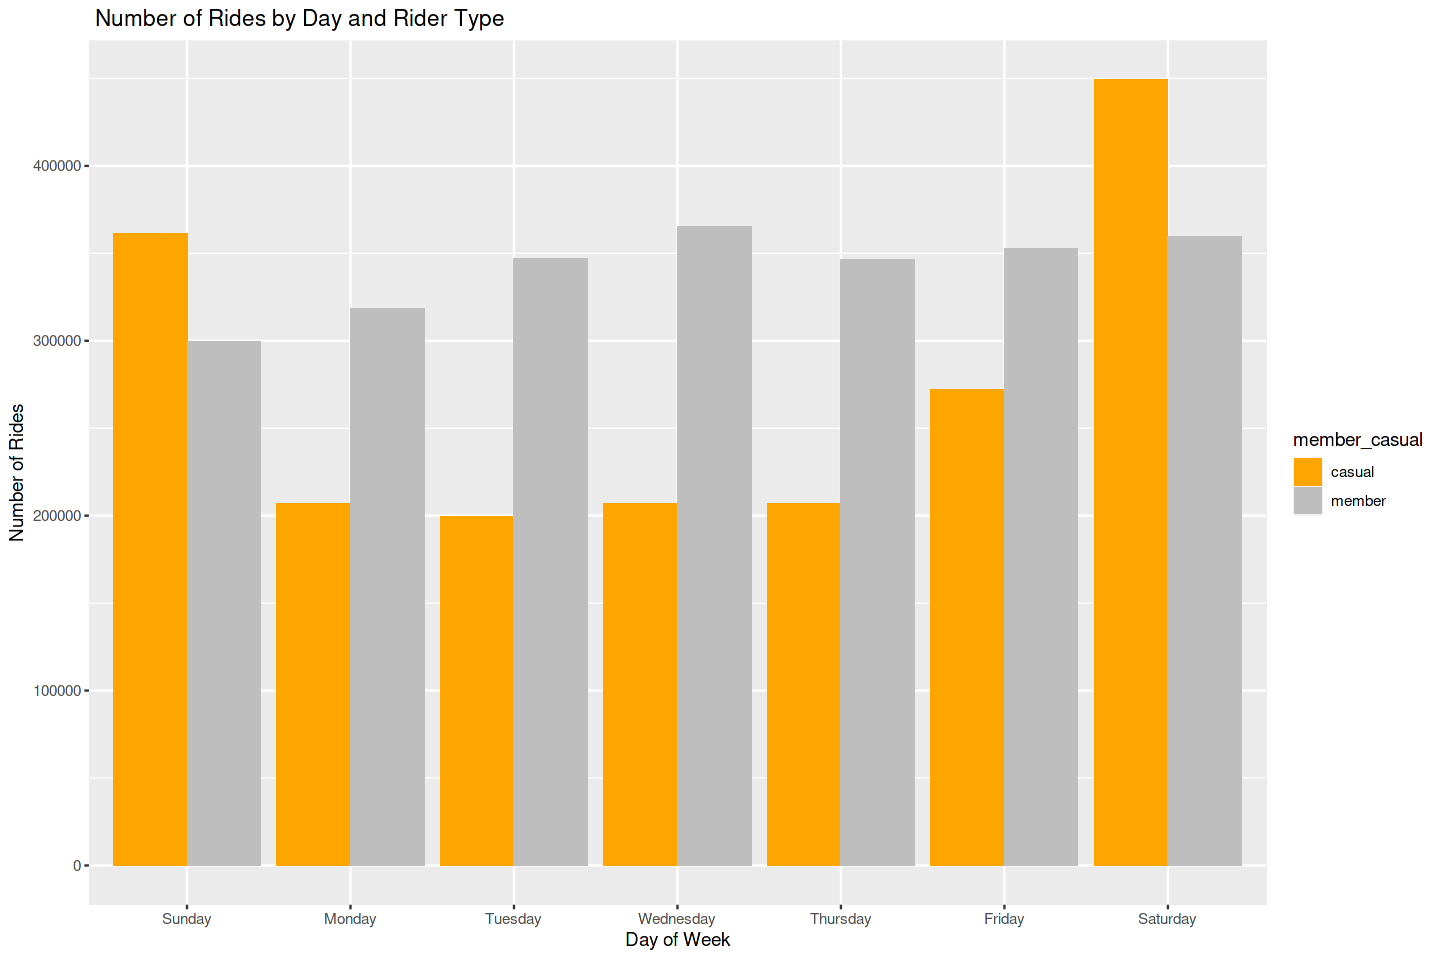

In [65]:
# Number of Rides by Day and Rider Type


ggplot(bike_usage_by_day_of_week,aes(x = day_of_week, y = ride_count , fill = member_casual)) + geom_col(position = "dodge")+
  #scale_fill_brewer(palette = "Dark2")+
  scale_fill_manual(values = c("orange","grey"))+
   labs(title = " Number of Rides by Day and Rider Type") + 
  ylab("Number of Rides") + 
  xlab("Day of Week")

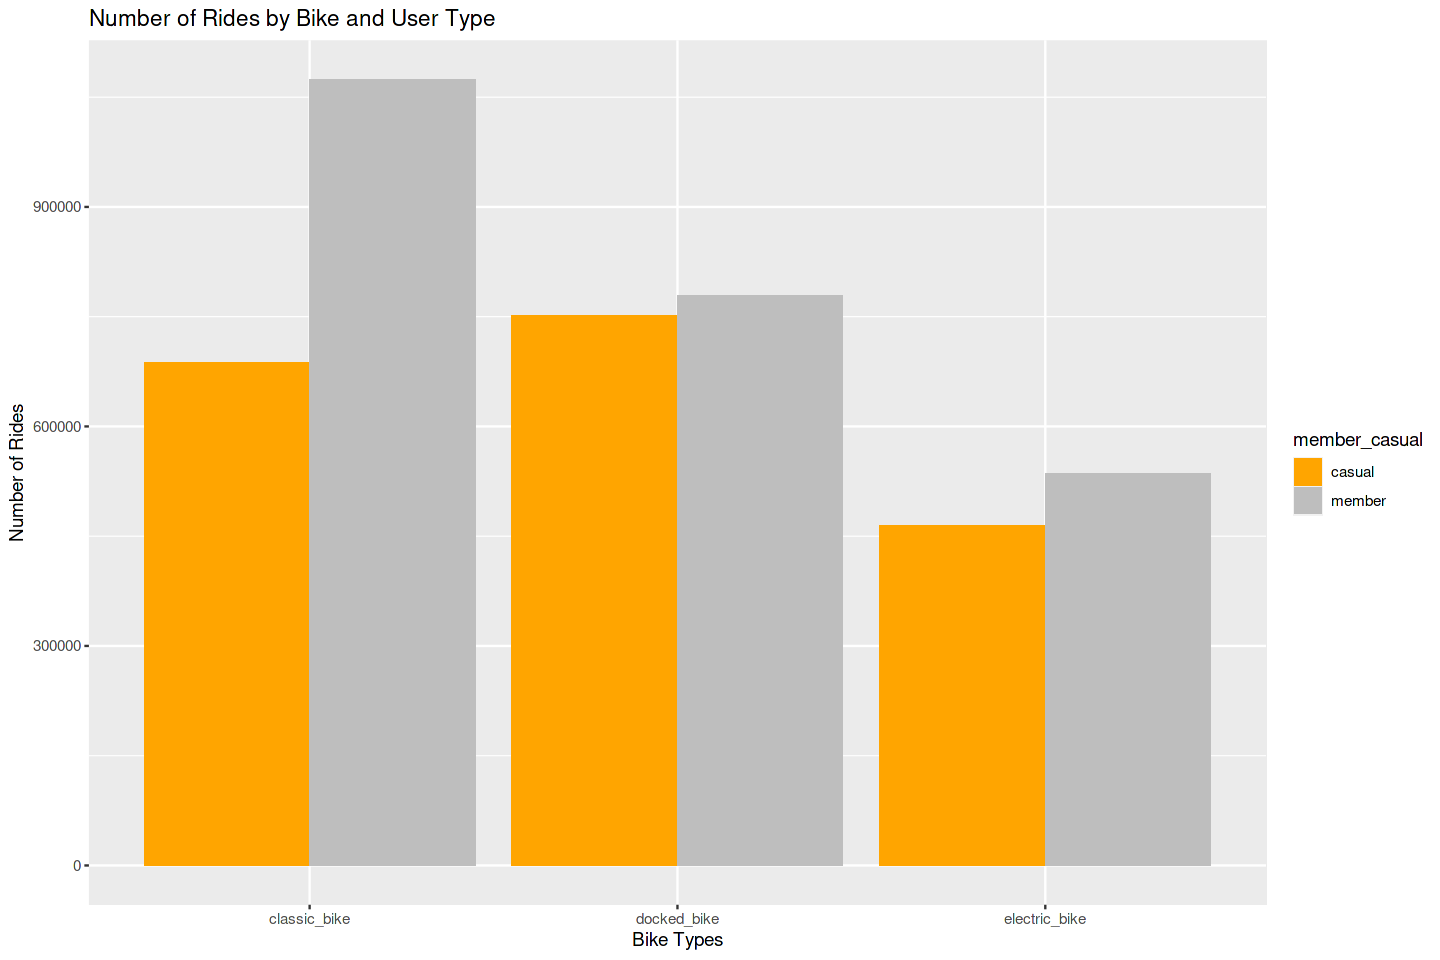

In [66]:
# Number of Rides by Bike and User Type
ggplot(bike_type_usage,aes(x = rideable_type, y = ride_count , fill = member_casual)) + geom_col(position = "dodge")+
    scale_fill_manual(values = c("orange","grey"))+
   labs(title = "Number of Rides by Bike and User Type") + 
  ylab("Number of Rides") + 
  xlab("Bike Types")

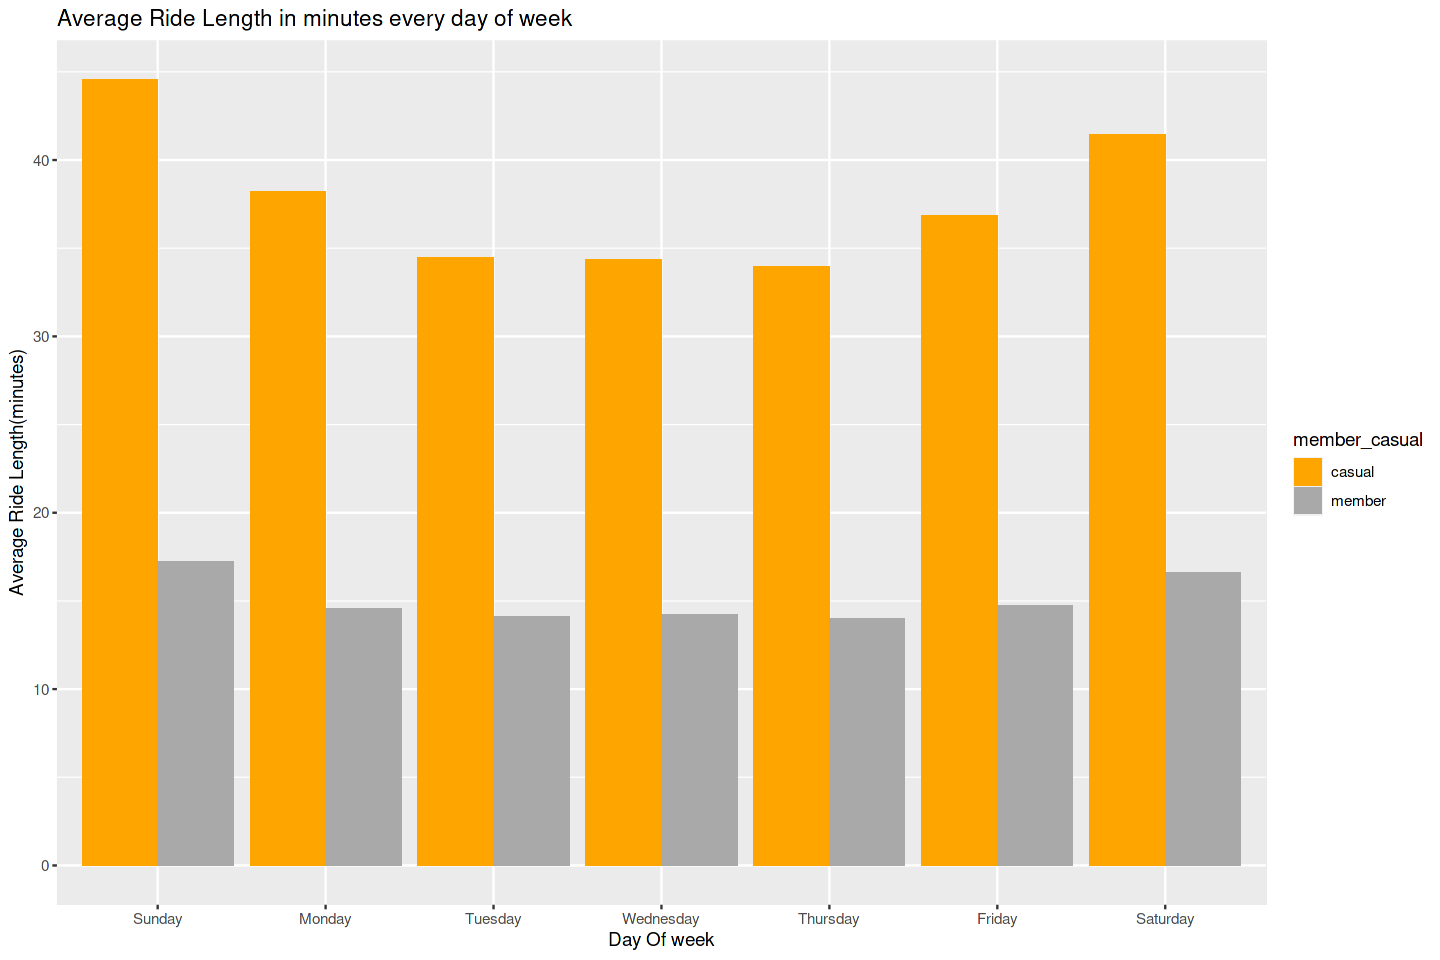

In [67]:
# Average Ride Length in minutes every day of week
ggplot(mean_ride_duration_week,aes(x = week_day, y = mean_ride_length , fill = member_casual)) + geom_col(position = "dodge")+
    scale_fill_manual(values = c("orange","darkgrey"))+
   labs(title = "Average Ride Length in minutes every day of week") + 
  ylab("Average Ride Length(minutes)") + 
  xlab("Day Of week")

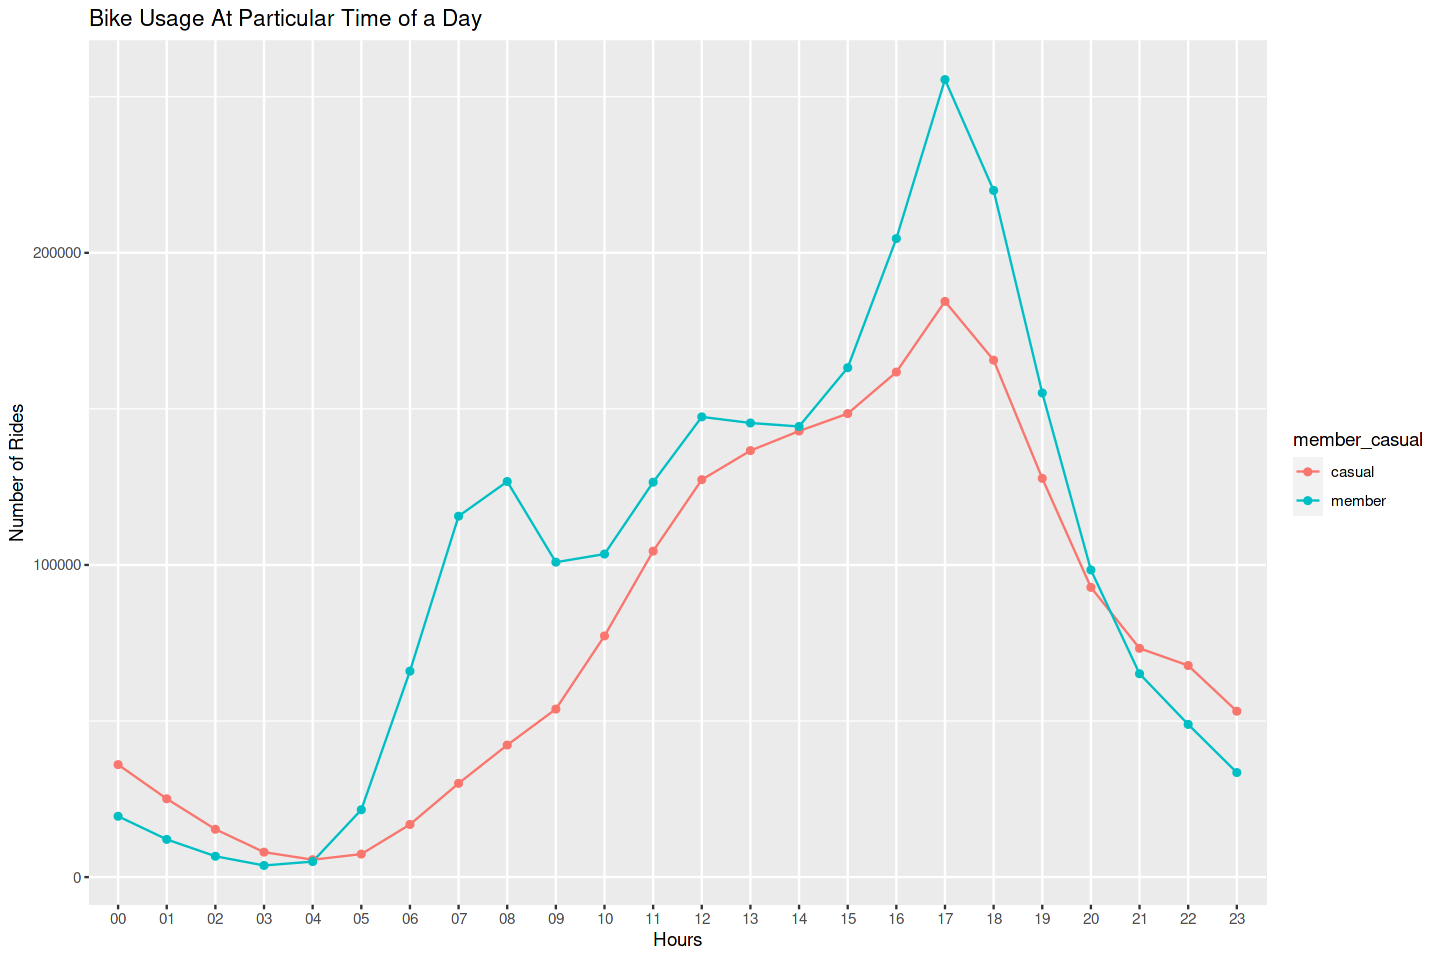

In [68]:
# Bike Usage At Particular Time of a Day
ggplot(bike_usage_by_time,aes(x = time_of_start, y = ride_count,group=member_casual )) + geom_line(aes(color=member_casual)) +geom_point(aes(color=member_casual)) +   
scale_fill_manual(values = c("orange","blue"))+
   labs(title = "Bike Usage At Particular Time of a Day") + 
  ylab("Number of Rides") + 
  xlab("Hours")

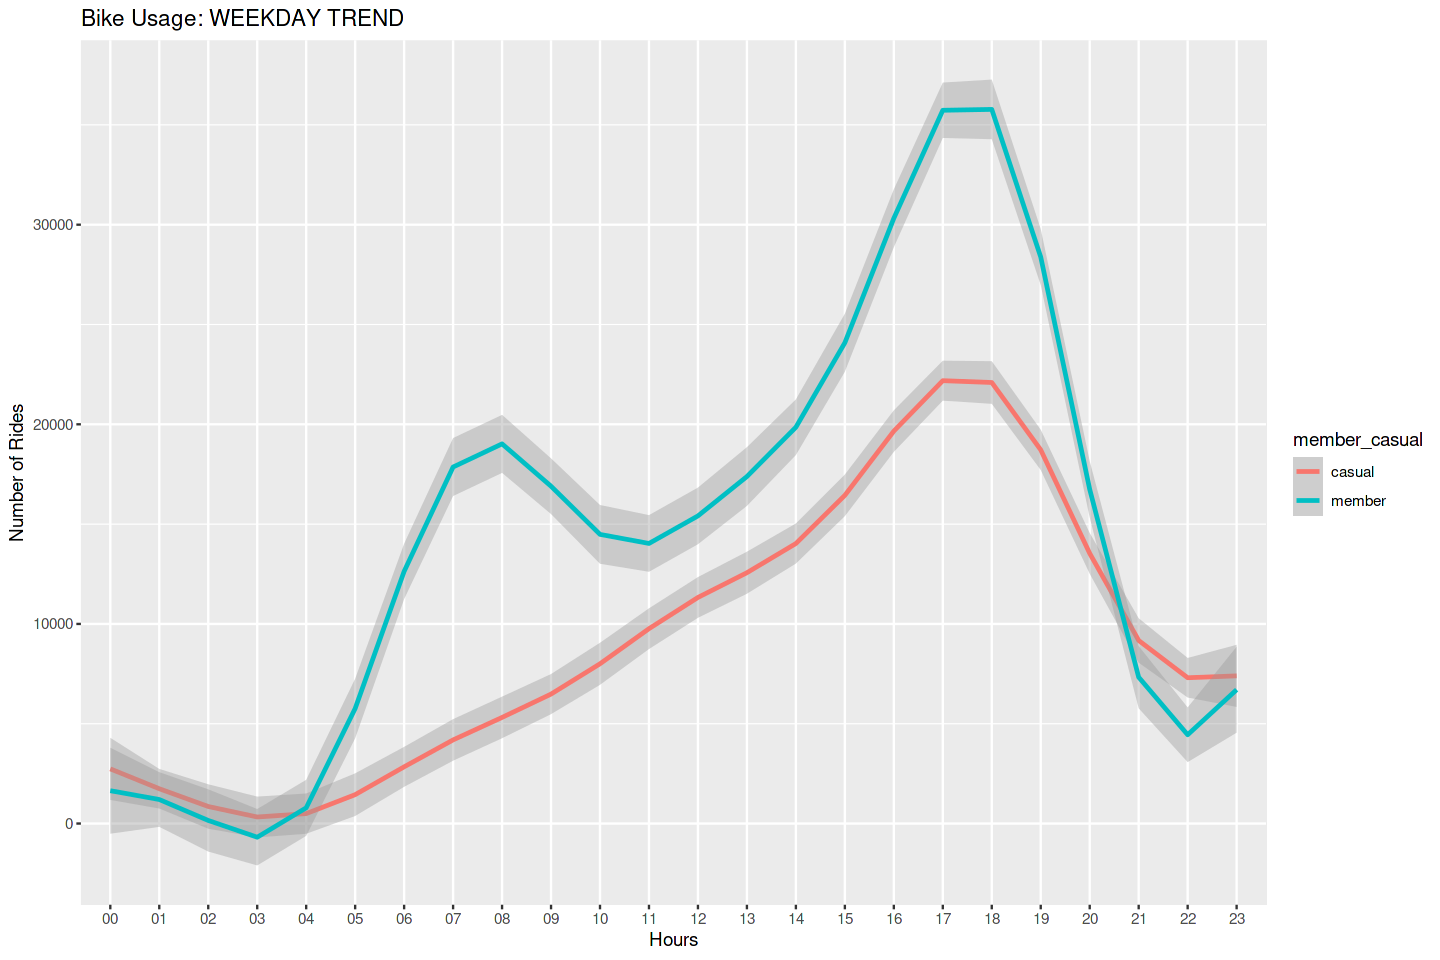

In [69]:
#Bike Usage: WEEKDAY TREND
ggplot(bike_usage_by_weekday, aes(x=time_of_start, y= ride_count,group=member_casual))+
    geom_smooth(method="gam", formula = y ~s(x),aes(color=member_casual))+
scale_fill_manual(values = c("orange","blue"))+
   labs(title = "Bike Usage: WEEKDAY TREND") + 
  ylab("Number of Rides") + 
  xlab("Hours")

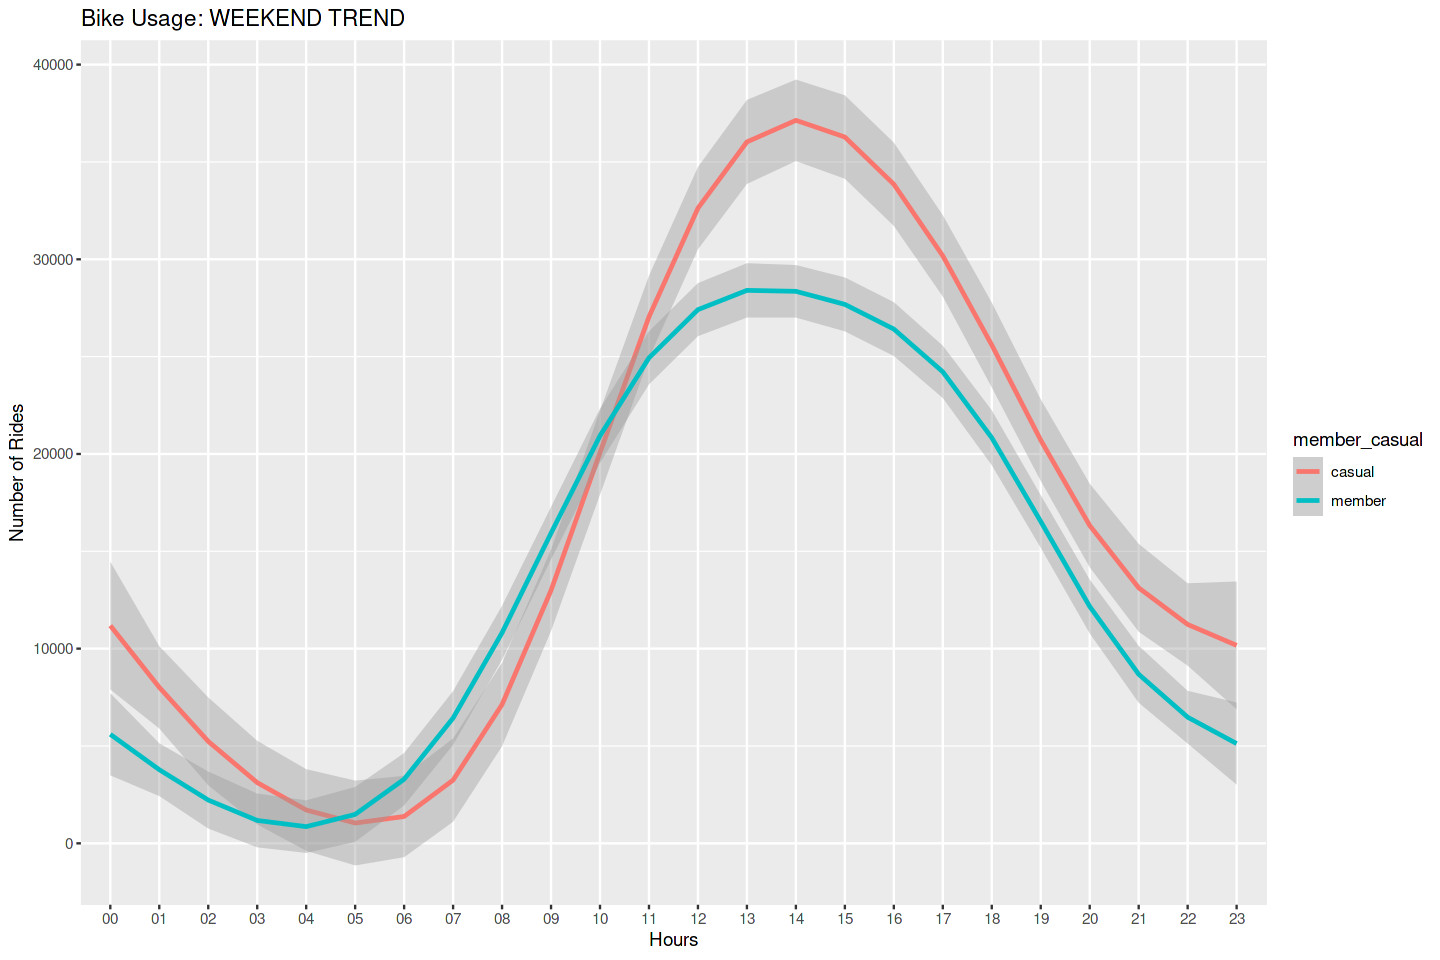

In [70]:
# Bike Usage: WEEKEND TREND
ggplot(bike_usage_by_weekend, aes(x=time_of_start, y= ride_count,group=member_casual))+
    geom_smooth(method="gam", formula = y ~s(x),aes(color=member_casual))+
scale_fill_manual(values = c("orange","black"))+
   labs(title = "Bike Usage: WEEKEND TREND") + 
  ylab("Number of Rides") + 
  xlab("Hours")

### Key Findings



**Summary of key findings from the anlaysis**
* Average ride length for all user types is **26 minutes**.
     *  For Members the Average ride length is about **15 minutes**
     *  For Casual Users/Non Members the Average ride length is about **38 minutes**
  
* Member or not the most popular day to rent a bike is **Saturday**.
    * For Members the most number of bikes are rented on **Wednesday**.  see [here](https://public.tableau.com/app/profile/anshul.shukla/viz/WeeklyTrendsCasualVsMembers/WeeklytrendsCasualVsMembers)
    * For Casual users the most number of bikes are rented on **Saturday**  see [here](https://public.tableau.com/app/profile/anshul.shukla/viz/WeeklyTrendsCasualVsMembers/WeeklytrendsCasualVsMembers)
    
* Bike Rentals start off with a low on Mondays and reach its peak on Saturday with over 809K commutes 
* Mondays to Fridays average bike rented are about 565K.    **[see here](https://public.tableau.com/app/profile/anshul.shukla/viz/CyclisticTrendsAnalysisCapstoneProject_/RideTrends)**
    * Saturdays and Sundays average bike rented are acout 735K.
    * **Weekends see an increase of about 1.3x times the weekdays in renting a bike**. 
    
    
    
    
* On any day of the week, **casual users ride 2.3x longer than members**.  **[see here](https://public.tableau.com/app/profile/anshul.shukla/viz/CyclisticTrendsAnalysisCapstoneProject/CyclisticMeanRideLengthComparisons)**

* Among **members most popular bike option is "classic bike"**.
* Among **casual users "docked bike" is the most popular option**.  **[see here](https://public.tableau.com/app/profile/anshul.shukla/viz/CyclisticTrendsAnalysisCapstoneProject_/RideTrends)**


* Trends in bike rental variation over a year
    * For both the user types **July to Aug** see a rise in bike rentals (may be beacause of the summer season)   [**see here**](https://public.tableau.com/app/profile/anshul.shukla/viz/CyclisticTrendsAnalysisCapstoneProject_/RideTrends)  Line Chart
    
    

* Hourly variations on weekdays
    * bike rentals traffic rises from **15th hour to 19th hour** for both user type on weekdays (But number of bikes rented by Members is more than casual users on weekdays)
    *  on weekends bike rentals see a sharp rise for casual users during evening and number of bikes rented by them is more than members.
    
    [**see the line chart showing variations here**](https://public.tableau.com/app/profile/anshul.shukla/viz/WeeklyTrendsCasualVsMembers/WeeklytrendsCasualVsMembers)


### ACT

**The question was how members and casual users rent bikes differently**
*     Members use bikes for daily commute to work or to schools, colleges. This is because the variations in weekly rides by members is consistent.
*     Casual riders on the other hand use the bikes mostly on weekends their numbers increases on weekends indicating that casual riders use bike rentals for leisure activities.
*  May to October see a rise in the number of bike rentals for both user types.

#### *Recommendations*

1. **As most of the bike rentals are during the months of May to October the company should maximizing member users by introducing an easy, customizable and flexible subscription model with deals, discounts, or promotions for new members.**

2. **Offering promotions and customized annual plans for the top routes that are travelled by casual users (plans should reflect on the mobile app in their recommendations)** 
3.  **The casual users have an average ride length which is 2.3 times that of a member user. The company should look for ways for promoting more shorter bike rides of about 20 minutes. A user with frequent short bike rides is likely to get annual subscription as it is very clear. For this purpose, the company can introduce new campaigns and new short ride plans with benefits of shorter bike rides to the general public and its existing casual customers.**

1. 